#RandomForest Classifier

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [133]:
# CSV 파일 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/2023_2_ML/20232ML_data/mon.csv'
data = pd.read_csv(file_path)

In [134]:
data = data.T

In [135]:
# 첫 번째 행 삭제
X = data.drop(data.index[0])  # 첫 번째 행 삭제
X.shape

(19000, 36)

In [136]:
# 정답 데이터 y 생성
num_elements = 200
num_repeats = 95

y = np.repeat(np.arange(95), num_elements)
y.shape

(19000,)

In [137]:
# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# RandomForest Classifier

Grid Search는 GPU 제한 + 시간 초과로 인해 RandomForest에서 이용 불가

n_estimators = 300에서 가장 accuracy 높음 (300, 400, 200, 500, 100 순)

min_samples_split = 2 일때 가장 accuracy 높음 (split 값 증가할 수록 acc 감소)

min_samples_leaf = 1 일때 가장 accuray 높음 (leaf 값 증가할 수록 acc 감소)

In [140]:
# 1. RF - default : 0.78
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.78

In [156]:
# 2. RF - n_ = 200:0.7852631578947369
model = RandomForestClassifier(random_state=42, n_estimators= 200)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7852631578947369

In [142]:
# 3. RF - n_ = 300: 0.7871052631578948
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7871052631578948

In [157]:
# 4. RF - n_ = 400: 0.7852631578947369
model = RandomForestClassifier(random_state=42, n_estimators= 400)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7852631578947369

In [143]:
# 5. RF - n_ = 500 : 0.7857894736842105
model = RandomForestClassifier(random_state=42, n_estimators= 500)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7857894736842105

In [144]:
# 6. RF - min_samples_split = 3 : 0.7771052631578947
model = RandomForestClassifier(random_state=42, min_samples_split = 3)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7771052631578947

In [146]:
# 7. RF - min_samples_split = 5 : 0.7757894736842105
model = RandomForestClassifier(random_state=42, min_samples_split = 5)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7757894736842105

In [148]:
# 8. RF - min_samples_leaf = 2 : 0.7705263157894737
model = RandomForestClassifier(random_state=42, min_samples_leaf = 2)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7705263157894737

In [147]:
# 9. RF - min_samples_leaf = 3 : 0.7652631578947369
model = RandomForestClassifier(random_state=42, min_samples_leaf = 3)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7652631578947369

# Decision Tree 로 Feature Importance 계산
# Feature Importance 결과 상위 5, 10, 15, 20, 25, 30, 35 feature로 model
best_parmas 인 n_estimators = 300 모델 적용

25개일 때 acc 가 0.7928947368421052 로 가장 우수

25 다음 30, 20, 25 10, 15, 5개 순

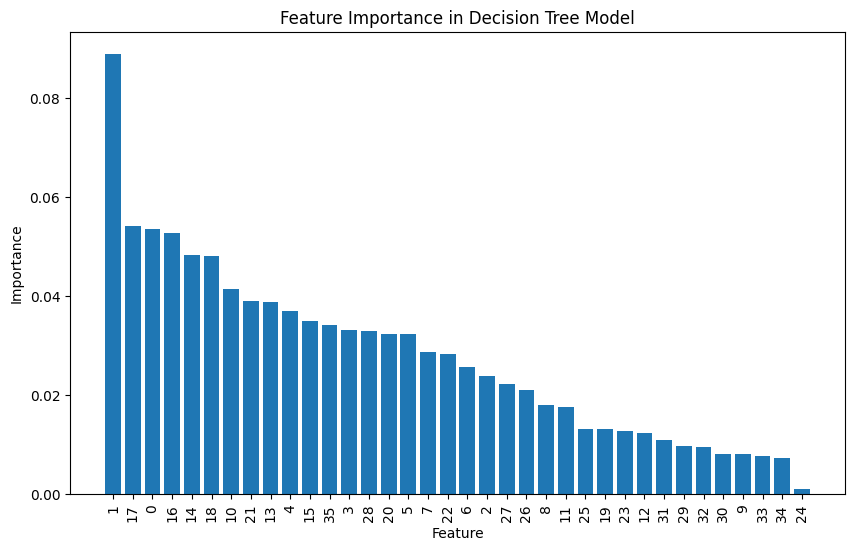

In [139]:
# 특성 중요도 확인
model = DecisionTreeClassifier(random_state=42)
model.fit(X_scaled, y)

feature_importance = model.feature_importances_

# 중요도를 내림차순으로 정렬하여 시각화
sorted_idx = feature_importance.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

In [153]:
# 가장 효과가 좋은 n_estimators = 300 에서 feature importance 뽑아서 돌려보기
# 선택할 특성 인덱스 상위 5개 : 0.6865789473684211
selected_features_indices = [1, 17, 0 , 16, 14]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.6865789473684211

In [155]:
# 선택할 특성 인덱스 상위 10개 :0.7476315789473684
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7476315789473684

In [154]:
# 선택할 특성 인덱스 상위 15개 : 0.7323684210526316
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7323684210526316

In [152]:
# 선택할 특성 인덱스 상위 20개 : 0.7881578947368421
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20, 5, 7, 22, 6, 2]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7881578947368421

In [158]:
# 선택할 특성 인덱스 상위 25개 : 0.7928947368421052
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20, 5, 7, 22, 6, 2,  27, 26, 8, 11, 25]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7928947368421052

In [163]:
# 선택할 특성 인덱스 상위 30개 :0.
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20, 5, 7, 22, 6, 2,  27, 26, 8, 11, 25, 19, 23, 12, 31, 29]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7889473684210526

In [162]:
# 선택할 특성 인덱스 상위 35개 :0. 7863157894736842
selected_features_indices = [1, 17, 0 , 16, 14, 18, 10, 21, 13, 4, 15, 35, 3, 28, 20, 5, 7, 22, 6, 2,  27, 26, 8, 11, 25, 19, 23, 12, 31, 29, 32, 30, 9, 33, 34]

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X2 = X.iloc[:, selected_features_indices]  # 특성 데이터

X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators= 300)
model.fit(X2_train, y_train)

# 모델 평가
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7863157894736842